In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df_unfiltered = pd.read_csv('stations_data.csv')
territory_df = pd.read_excel('SDGE_territory.xlsx')
columns_to_keep = ['access_code', 'access_days_time', 'cards_accepted', 'expected_date', 'fuel_type_code', 'id','maximum_vehicle_class', 'open_date', 'owner_type_code',
'restricted_access', 'status_code', 'funding_sources', 'facility_type','station_name',
'latitude', 'longitude', 'city', 'country', 'intersection_directions','state', 'street_address', 'zip']
df = df_unfiltered[columns_to_keep]
sdge_df = df.merge(territory_df, left_on = 'zip', right_on = 'ZIP_CODE')
sdge_df

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_18139/1102994482.py:9: DtypeWarning: Columns (14,28,33,46,50,51,52,53,54,55,56,60,62,63,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unfiltered = pd.read_csv('stations_data.csv')


,access_code,access_days_time,cards_accepted,expected_date,fuel_type_code,id,maximum_vehicle_class,open_date,owner_type_code,restricted_access,status_code,funding_sources,facility_type,station_name,latitude,longitude,city,country,intersection_directions,state,street_address,zip,ZIP_CODE,COMMODITIES_AVAILABLE
0,private,NaN,NaN,NaN,CNG,829,LD,1991-05-15,T,NaN,E,NaN,UTILITY,PG&E - San Jose Service Center,37.335663,-121.907088,San Jose,US,NaN,CA,308 Stockton Ave,95126,95126,Electric Only
1,public,5:30am-5pm M-F; located behind gate,A D M V,NaN,CNG,939,HD,1996-12-15,P,False,E,NaN,SCHOOL,Chula Vista Education Center,32.631042,-117.057953,Chula Vista,US,NaN,CA,84 E J St,91910,91910,Electric & Gas
2,public,24 hours daily,A D M V Voyager Wright_Exp,NaN,CNG,942,LD,1996-12-15,T,False,E,NaN,UTILITY,San Diego Gas and Electric - Carlsbad,33.134114,-117.332344,Carlsbad,US,"Exit I-5 at Cannon Rd, west on Cannon, and the...",CA,602 Cannon Rd,92008,92008,Electric & Gas
3,private,NaN,NaN,NaN,CNG,944,MD,1996-12-15,P,NaN,E,NaN,FLEET_GARAGE,Trillium - North County Transit District West,33.212510,-117.352490,Oceanside,US,At Via Del Monte.,CA,303 Via Del Norte,92058,92058,Electric & Gas
4,public,6am-6pm M-F (except holidays or district reces...,ARI CREDIT Debit M V,NaN,CNG,945,HD,1991-06-15,LG,False,E,NaN,SCHOOL,Poway Unified School District,32.978339,-117.034924,Poway,US,"Exit I-15 at Ted Williams Parkway, east 1 mile...",CA,13626 Twin Peaks Rd,92064,92064,Electric & Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,public,24 hours daily,NaN,NaN,ELEC,355494,NaN,2024-09-12,NaN,NaN,E,NaN,NaN,SKYLINE C.A. STATION 2,33.133230,-117.222975,Vista,US,Near pool,CA,2314 Verano Wy.,92081,92081,Electric & Gas
1353,public,24 hours daily,A D Debit M V,NaN,ELEC,355552,LD,2024-09-11,P,False,E,NaN,PARKING_LOT,Las Cazuelas - Tesla Supercharger,37.329578,-121.912132,San Jose,US,NaN,CA,55 Race St,95126,95126,Electric Only
1354,public,24 hours daily,NaN,NaN,ELEC,356127,NaN,2024-09-21,NaN,NaN,E,NaN,NaN,El Norte Broadway Center - Escondido,33.139940,-117.089910,Escondido,US,NaN,CA,110 W El Norte Pkwy,92026,92026,Electric & Gas
1355,public,9am-5pm M-F,A ACCOUNT_BALANCE CREDIT D Debit M V,NaN,ELEC,356216,LD,2024-07-31,P,False,E,NaN,MULTI_UNIT_DWELLING,Boardwalk Condos,32.869390,-117.234510,La Jolla,US,NaN,CA,8830 Villa La Jolla Dr,92037,92037,Electric & Gas


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


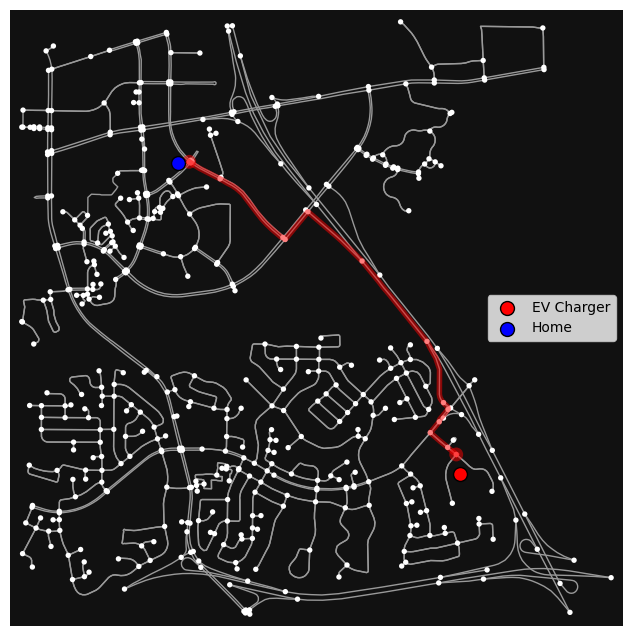

In [ ]:
ev_charger = (32.853080, -117.18448)  # EV charger coordinates
home = (32.8719468, -117.204839)  # Home coordinates

# Download the map graph for the area
center_point = ((ev_charger[0] + home[0]) / 2, (ev_charger[1] + home[1]) / 2)
G = ox.graph_from_point(center_point, dist=2000, network_type='drive')

# Find the nearest nodes to the EV charger and your home in the road network
home_node = ox.distance.nearest_nodes(G, home[1], home[0])
ev_charger_node = ox.distance.nearest_nodes(G, ev_charger[1], ev_charger[0])

# Calculate the shortest path between the two nodes
route = ox.shortest_path(G, home_node, ev_charger_node, weight='length')

# Plot the map with the route
fig, ax = ox.plot_graph_route(G, route, show=False, close=False)

# Plot the EV charger and home points
ax.scatter(ev_charger[1], ev_charger[0], c='red', s=100, label='EV Charger', edgecolor='black')
ax.scatter(home[1], home[0], c='blue', s=100, label='Home', edgecolor='black')

# Add a legend
ax.legend()
plt.show()


In [19]:
home = (32.8719468, -117.204839)

# Download a graph that includes your home and nearby EV chargers
center_point = home
G = ox.graph_from_point(center_point, dist=5000, network_type='drive')

# Find the nearest node to your home
home_node = ox.distance.nearest_nodes(G, home[1], home[0])

# Find the nearest node to a specific charger (just one example here)
charger = (32.853080, -117.18448)  # Example charger coordinates
charger_node = ox.distance.nearest_nodes(G, charger[1], charger[0])

# Calculate the shortest path and distance between the home and the charger
try:
    route = ox.shortest_path(G, home_node, charger_node, weight='length')
    distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))
    print(f"Shortest driving distance: {distance / 1000:.2f} km")
except nx.NetworkXNoPath:
    print("No path found between the points.")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Shortest driving distance: 3.20 km


/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_94925/2820885044.py:20: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `routing.route_to_gdf` function instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(
/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_94925/3034451685.py:27: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `routing.route_to_gdf` function instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))


Nearest charger is at index 5: (32.876295, -117.166362)
Shortest driving distance: 4.24 km


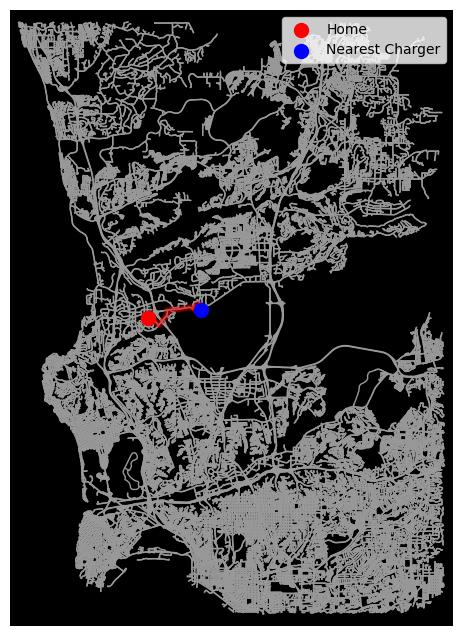

In [115]:
home = (32.8719468, -117.204839)

# List of 1000 charger locations (latitude, longitude)
chargers = list(zip(sdge_df['latitude'],sdge_df['longitude']))[:10]

# 1. Load the road network for San Diego (adjust 'dist' for your area)
center_point = home  # or use the centroid of all chargers
G = ox.graph_from_point(center_point, dist=20000, network_type='drive')

# 2. Find the nearest node to your home
home_node = ox.distance.nearest_nodes(G, home[1], home[0])

# 3. Find the nearest nodes to all the chargers
nearest_nodes = [ox.distance.nearest_nodes(G, charger[1], charger[0]) for charger in chargers]

# 4. Calculate the shortest path and driving distance to each charger
shortest_distance = float('inf')
nearest_charger_node = None
nearest_charger_index = None
shortest_route = None

for idx, charger_node in enumerate(nearest_nodes):
    try:
        # Calculate the shortest path between home and the charger node
        route = nx.shortest_path(G, home_node, charger_node, weight='length')
        # Calculate the total distance for this path
        distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))
        
        # Check if this is the shortest distance so far
        if distance < shortest_distance:
            shortest_distance = distance
            nearest_charger_node = charger_node
            nearest_charger_index = idx
            shortest_route = route
    except nx.NetworkXNoPath:
        # If there's no path to this charger, skip it
        continue

# 5. Print the nearest charger and its driving distance
if nearest_charger_node:
    print(f"Nearest charger is at index {nearest_charger_index}: {chargers[nearest_charger_index]}")
    print(f"Shortest driving distance: {shortest_distance / 1000:.2f} km")
    
    # 6. Plot the graph, home, nearest charger, and the route
    fig, ax = ox.plot_graph_route(G, shortest_route, route_linewidth=4, node_size=0, bgcolor='k',
                                  show=False, close=False)
    
    # Add a marker for your home
    home_lat, home_lon = home
    ax.scatter(home_lon, home_lat, c='red', s=100, label='Home', zorder=5)
    
    # Add a marker for the nearest charger
    charger_lat, charger_lon = chargers[nearest_charger_index]
    ax.scatter(charger_lon, charger_lat, c='blue', s=100, label='Nearest Charger', zorder=5)
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()
    
else:
    print("No path found to any charger.")


In [12]:
import cenpy
conn = cenpy.products.APIConnection("ACSDT5Y2022")
cenpy_data = conn.query(["B19013_001E","B15003_001E","B15003_017E","B15003_022E"], geo_unit = 'zip code tabulation area')
cenpy_data = cenpy_data.rename(columns={'B19013_001E': 'income','zip code tabulation area': 'zip', 'B15003_001E': 'total_population',"B15003_017E": 'population_bachelor','B15003_022E': 'population_advanced'})
cenpy_data['zip'] = cenpy_data['zip'].astype(int)
cenpy_data['income'] = cenpy_data['income'].astype(int)
cenpy_data['total_population'] = cenpy_data['total_population'].astype(int)
cenpy_data['population_bachelor'] = cenpy_data['population_bachelor'].astype(int)
cenpy_data['population_advanced'] = cenpy_data['population_advanced'].astype(int)
cenpy_data = cenpy_data[cenpy_data['income'] > 0]



In [18]:
merged_df = sdge_df.merge(cenpy_data,left_on = 'ZIP_CODE', right_on = 'zip')#.set_index('zip')
total_population = merged_df.groupby('city').sum()['total_population']
population = merged_df.groupby('city').sum()['total_population']

city
Aliso Viejo                207344
Alpine                       5046
Camp Pendleton             180305
Campo                         920
Cardiff by the Sea           2922
Carlsbad                   470862
Carmel Valley               13432
Chula Vista                428995
Coronado                    32816
Coto De Caza                 7838
Dana Point                  15038
Del Mar                     34596
El Cajon                   426396
Encinitas                  197764
Escondido                  260586
Fallbrook                  103936
Guatay                        116
Huntington Beach             7949
Imperial Beach               8202
Jamul                        1352
Julian                        513
La Jolla                   365430
La Mesa                     84138
Ladera Ranch                25191
Laguna Beach                64467
Laguna Hills                98396
Laguna Niguel               77940
Laguna Woods                 7767
Lakeside                    51320
Lemon Gro

In [21]:
temp_df = pd.DataFrame(sdge_df.groupby('zip').count()['access_code'])
merged_df2 = temp_df.merge(cenpy_data,left_index = True, right_on = 'zip')#.set_index('zip')
merged_df2 = merged_df2.rename(columns={'access_code': 'count'})

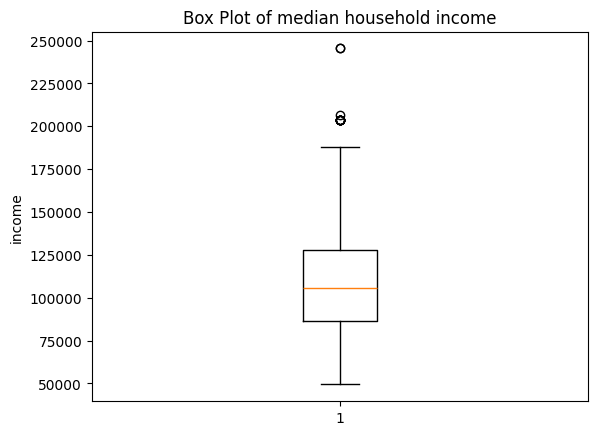

In [22]:
plt.boxplot(merged_df['income'])
plt.title('Box Plot of median household income')
plt.ylabel('income')
plt.show()

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_18139/2129176645.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


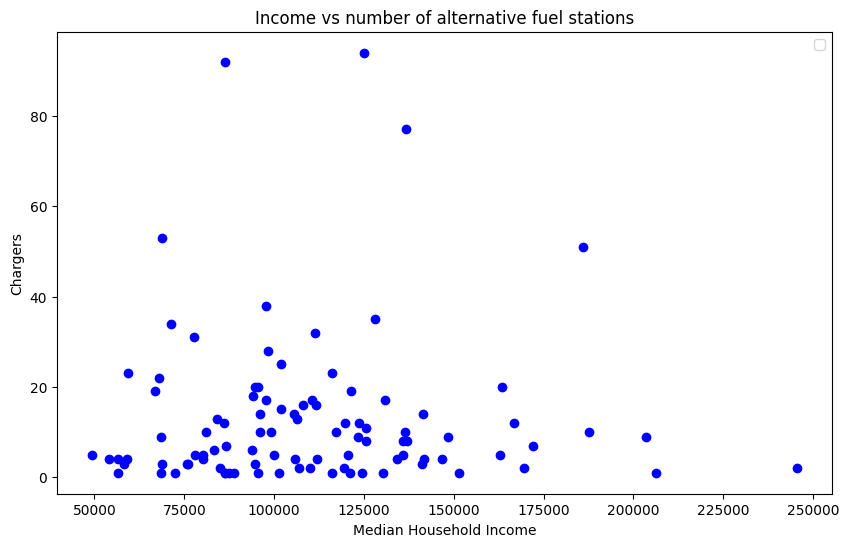

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df2['income'], merged_df2['count'], c='blue')

plt.title('Income vs number of alternative fuel stations')
plt.ylabel('Chargers')
plt.xlabel('Median Household Income')
plt.legend()
plt.show()

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_94925/449912909.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


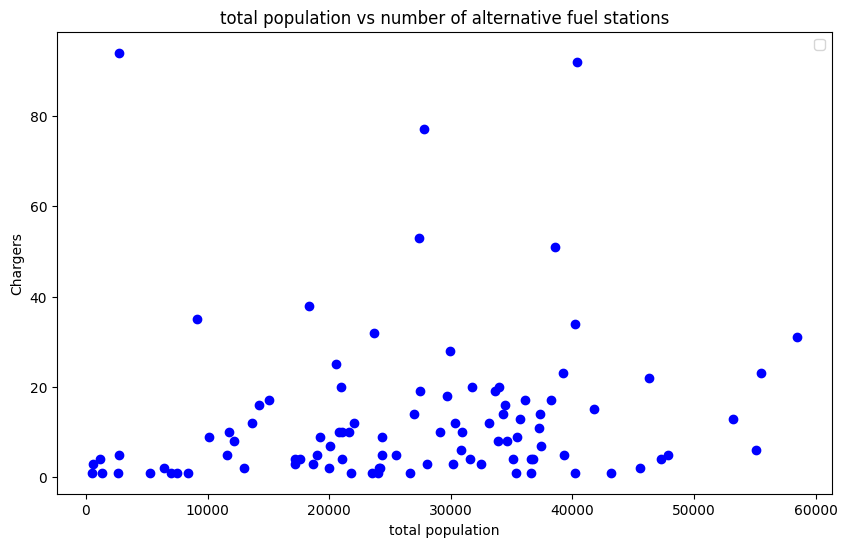

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df2['total_population'], merged_df2['count'], c='blue')

plt.title('total population vs number of alternative fuel stations')
plt.ylabel('Chargers')
plt.xlabel('total population')
plt.legend()
plt.show()

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_18139/2420589932.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


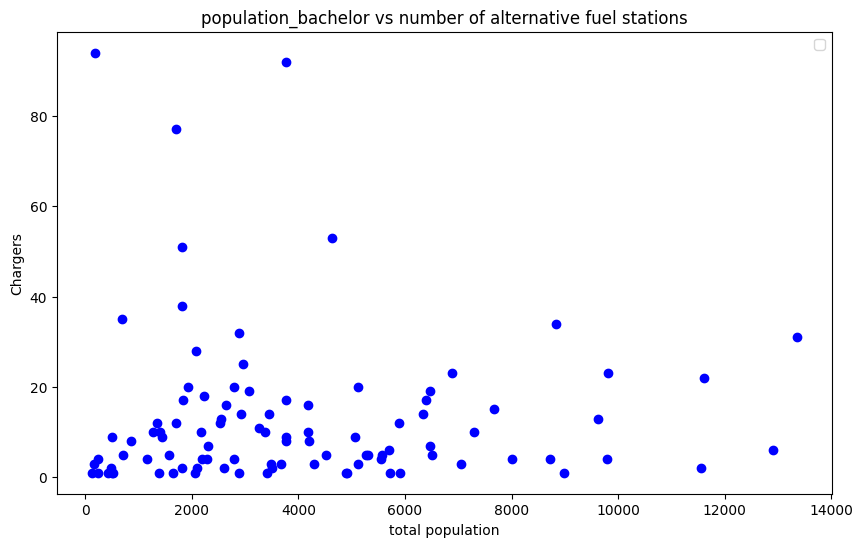

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df2['population_bachelor'], merged_df2['count'], c='blue')

plt.title('population_bachelor vs number of alternative fuel stations')
plt.ylabel('Chargers')
plt.xlabel('total population')
plt.legend()
plt.show()